<a href="https://colab.research.google.com/github/ahdonjuan/r-basic/blob/master/Proyecto_2_JAHE_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install QuantLib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 18.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import QuantLib as ql

# Parámetros iniciales
timestep, length, numPaths = 24, 25/365, 2**15
today = ql.Date().todaysDate()
riskFreeTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.11, ql.Actual365Fixed()))
dividendTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.01, ql.Actual365Fixed()))
initialValue = ql.QuoteHandle(ql.SimpleQuote(100))

# Parámetros del modelo Heston
v0, kappa, theta, rho, sigma = 0.001, 0.001, 0.001, 0, 0.2
hestonProcess = ql.HestonProcess(riskFreeTS, dividendTS, initialValue, v0, kappa, theta, sigma, rho)

# Generador de caminos
times = ql.TimeGrid(length, timestep)
dimension = hestonProcess.factors()
rng = ql.UniformRandomSequenceGenerator(dimension * timestep, ql.UniformRandomGenerator())
sequenceGenerator = ql.GaussianRandomSequenceGenerator(rng)
pathGenerator = ql.GaussianMultiPathGenerator(hestonProcess, list(times), sequenceGenerator, False)

# Generar caminos
paths = [[] for _ in range(dimension)]
for _ in range(numPaths):
    samplePath = pathGenerator.next()
    values = samplePath.value()
    for j in range(dimension):
        paths[j].append([x for x in values[j]])

# Crear DataFrame
data_3 = pd.DataFrame({"day": [i for i in range(timestep + 1)]})
for j in range(1000):
    dummy_name = "Scenario " + str(j)
    dummy_frame = pd.DataFrame({dummy_name: paths[0][j]})
    data_3 = pd.concat([data_3, dummy_frame], axis=1)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import QuantLib as ql

# Parámetros iniciales
timestep, length, numPaths = 24, 25/365, 2**15
today = ql.Date().todaysDate()
riskFreeTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.11, ql.Actual365Fixed()))
dividendTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.01, ql.Actual365Fixed()))
initialValue = ql.QuoteHandle(ql.SimpleQuote(100))

# Parámetros del modelo Heston
v0, kappa, theta, rho, sigma = 0.001, 0.001, 0.001, 0, 0.2
hestonProcess = ql.HestonProcess(riskFreeTS, dividendTS, initialValue, v0, kappa, theta, sigma, rho)

# Generador de caminos
times = ql.TimeGrid(length, timestep)
dimension = hestonProcess.factors()
rng = ql.UniformRandomSequenceGenerator(dimension * timestep, ql.UniformRandomGenerator())
sequenceGenerator = ql.GaussianRandomSequenceGenerator(rng)
pathGenerator = ql.GaussianMultiPathGenerator(hestonProcess, list(times), sequenceGenerator, False)

# Generar caminos
paths = [[] for _ in range(dimension)]
for _ in range(numPaths):
    samplePath = pathGenerator.next()
    values = samplePath.value()
    for j in range(dimension):
        paths[j].append([x for x in values[j]])

# Crear DataFrame
data_3 = pd.DataFrame({"day": [i for i in range(timestep + 1)]})
for j in range(1000):
    dummy_name = "Scenario " + str(j)
    dummy_frame = pd.DataFrame({dummy_name: paths[0][j]})
    data_3 = pd.concat([data_3, dummy_frame], axis=1)


In [14]:
data_3

,day,Scenario 0,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,...,Scenario 990,Scenario 991,Scenario 992,Scenario 993,Scenario 994,Scenario 995,Scenario 996,Scenario 997,Scenario 998,Scenario 999
0,0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1,99.906637,99.975741,99.978303,99.918772,99.878627,100.156360,99.875534,100.117969,100.023524,...,99.769443,99.950964,100.031803,99.939171,100.055307,100.146876,100.152137,99.898763,99.995383,99.974179
2,2,100.021268,99.930062,99.981750,99.969131,99.952397,100.394154,100.214331,100.155514,99.868955,...,99.709843,100.062269,100.251993,99.815800,100.262489,100.292515,100.235992,100.066997,99.765130,99.953658
3,3,100.066852,99.875182,99.757916,100.044326,99.767445,100.564362,100.111590,100.318426,100.052331,...,99.869420,100.496696,100.168834,99.775475,100.537146,100.502114,100.106585,100.235639,99.573072,100.005629
4,4,99.704427,99.571559,99.775715,100.303221,99.820926,100.703085,100.180625,100.494962,100.033334,...,100.695991,100.659394,100.350694,99.790818,100.305093,100.840642,100.200823,100.352045,99.401379,100.078433
5,5,99.742290,99.600916,99.788940,100.189244,99.696507,100.737056,100.211920,100.515579,100.107764,...,101.003054,100.505012,100.413668,99.875688,100.474236,100.613575,100.462662,100.188850,99.162281,100.129192
6,6,99.595661,99.397307,99.755208,100.457181,99.556231,100.627274,100.298809,100.635642,100.190242,...,101.092494,100.327230,100.635583,99.827225,100.297214,100.547234,100.639819,100.091440,98.981839,100.231152
7,7,99.699697,99.424805,99.864779,100.162455,99.580149,100.515253,100.358115,100.574170,100.701227,...,101.799731,100.366352,100.515201,99.945069,100.327134,100.645669,100.647623,100.087695,98.891614,100.215627
8,8,99.855995,99.168826,99.903654,100.362053,99.672108,100.394171,100.386760,100.614727,101.104337,...,101.868216,100.436624,100.441914,100.001527,100.520364,100.645785,99.817753,100.113404,99.105403,100.319577
9,9,99.978736,98.953005,99.931670,100.494938,99.883742,100.339221,100.415413,100.662031,100.632646,...,101.525894,100.422105,100.425003,100.042644,100.509087,100.604982,99.797109,100.052991,99.244457,100.418704


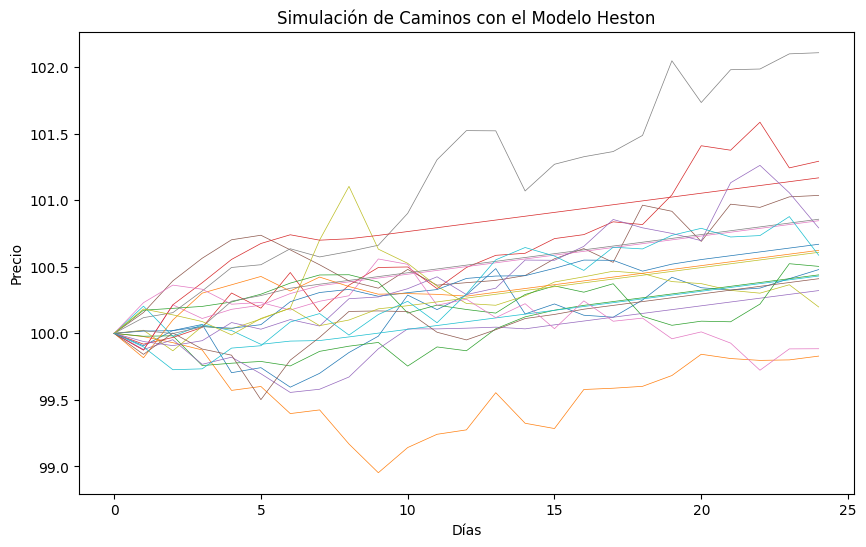

In [24]:
# Graficar algunos caminos
plt.figure(figsize=(10, 6))
for scenario in list(data_3.columns)[1:21]:  # Graficamos solo los primeros 20 escenarios para claridad
    plt.plot(data_3["day"], data_3[scenario], lw=0.5)
plt.xlabel("Días")
plt.ylabel("Precio")
plt.title("Simulación de Caminos con el Modelo Heston")
plt.show()


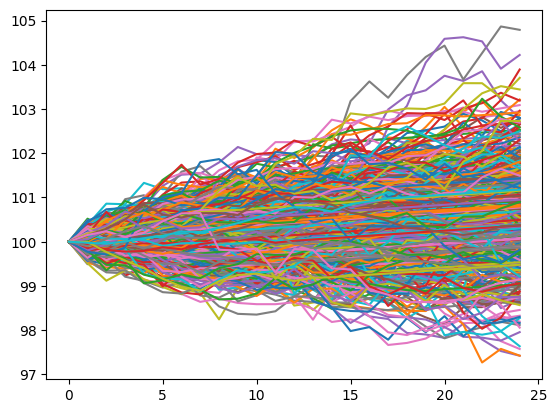

In [15]:
for scenario in list(data_3.columns)[1:]:
    plt.plot(data_3["day"],data_3[scenario])

In [16]:
def price_european_option(data, K, r, T):
    payoffs = []
    for s in list(data.iloc[timestep, 1:]):
        payoffs.append(np.maximum(s - K, 0) * np.exp(-r * T))
    return np.mean(payoffs)


In [17]:
def price_american_option(data, K, r, T):
    dt = T / timestep
    discount = np.exp(-r * dt)
    payoffs = np.zeros_like(data.values[:, 1:])
    payoffs[-1] = np.maximum(data.values[-1, 1:] - K, 0)

    for t in range(timestep - 1, 0, -1):
        regression = np.polyfit(data.values[t, 1:], payoffs[t + 1] * discount, 2)
        continuation_values = np.polyval(regression, data.values[t, 1:])
        exercise_values = np.maximum(data.values[t, 1:] - K, 0)
        payoffs[t] = np.where(exercise_values > continuation_values, exercise_values, payoffs[t + 1] * discount)

    option_price = np.mean(payoffs[1] * discount)
    return option_price


In [18]:
def price_barrier_option(data, K, r, T, barrier, barrier_type='up-and-out'):
    if barrier_type == 'up-and-out':
        barrier_hit = np.any(data.values[:, 1:] > barrier, axis=0)

    payoffs = []
    for s, hit in zip(data.iloc[timestep, 1:], barrier_hit):
        if hit:
            payoffs.append(0)
        else:
            payoffs.append(np.maximum(s - K, 0) * np.exp(-r * T))

    return np.mean(payoffs)


In [19]:
def price_asian_option(data, K, r, T):
    average_prices = data.values.mean(axis=0)[1:]
    payoffs = np.maximum(average_prices - K, 0) * np.exp(-r * T)
    return np.mean(payoffs)


In [20]:
def price_lookback_option(data, K, r, T):
    lookback_prices = np.max(data.values[:, 1:], axis=0)
    payoffs = np.maximum(lookback_prices - K, 0) * np.exp(-r * T)
    return np.mean(payoffs)


In [21]:
S0 = 100
K = 100
r = 0.11
sigma = 0.2
T = 25 / 365

european_call_price = price_european_option(data_3, K, r, T)
american_call_price = price_american_option(data_3, K, r, T)
barrier_call_price = price_barrier_option(data_3, K, r, T, barrier=110, barrier_type='up-and-out')
asian_call_price = price_asian_option(data_3, K, r, T)
lookback_call_price = price_lookback_option(data_3, K, r, T)

print("European Call Option Price:", european_call_price)
print("American Call Option Price:", american_call_price)
print("Barrier Call Option Price:", barrier_call_price)
print("Asian Call Option Price:", asian_call_price)
print("Lookback Call Option Price:", lookback_call_price)



European Call Option Price: 0.7656008504825763
American Call Option Price: 0.7232569890831464
Barrier Call Option Price: 0.7656008504825763
Asian Call Option Price: 0.3974610666170395
Lookback Call Option Price: 0.9113926528468517


In [25]:
payoff = []
for s in list(data_3.iloc[timestep, 1:]):
    payoff.append(np.maximum(s - 100, 0) * np.exp(-0.11 * 25 / 365))
call = np.mean(payoff)
print("Precio de la Opción Call Europea (Método Original):", call)


Precio de la Opción Call Europea (Método Original): 0.7656008504825763


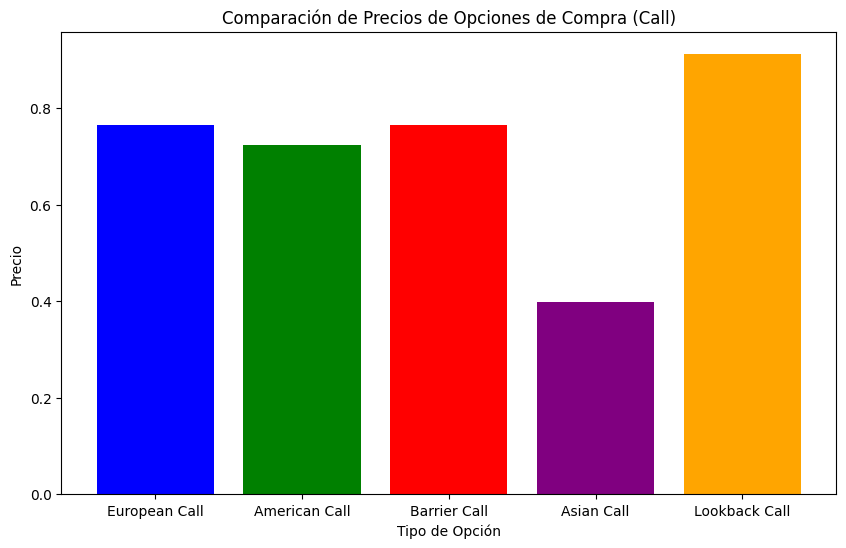

In [26]:
# Gráfica de barras para comparar los precios de las opciones
option_types = ['European Call', 'American Call', 'Barrier Call', 'Asian Call', 'Lookback Call']
option_prices = [european_call_price, american_call_price, barrier_call_price, asian_call_price, lookback_call_price]

plt.figure(figsize=(10, 6))
plt.bar(option_types, option_prices, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Tipo de Opción')
plt.ylabel('Precio')
plt.title('Comparación de Precios de Opciones de Compra (Call)')
plt.show()